# Online Customer Intension

### We have to predict bassed on the feature wheather a User will generate revenue in the Online Site or Not.. Basically in this we will find out the intention of the customer wheathers he will buy some thing or came online for checking the price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
odf=pd.read_csv('online_shoppers_intention.csv')
odf.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print("Number of rows:",odf.shape[0])
print("Number of columns:",odf.shape[1])

Number of rows: 12330
Number of columns: 18


In [4]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

Categorical : Month, VisitorType
Boolean : Weekend, Revenue

In [5]:
odf.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   
odf['Revenue_encoded']=le.fit_transform(odf['Revenue'])
odf.drop('Revenue',axis=1,inplace=True)
odf['Month_encoded']=le.fit_transform(odf['Month'])
odf.drop('Month',axis=1,inplace=True)
odf['VisitorType_encoded']=le.fit_transform(odf['VisitorType'])
odf.drop('VisitorType',axis=1,inplace=True)
odf['Weekend_encoded']=le.fit_transform(odf['Weekend'])
odf.drop('Weekend',axis=1,inplace=True)

In [7]:
raw_dataset=odf.copy()

#### Dropping Informational_Duration as it has 80% 0 value so the model is getting biased, also it is correlated with Informational feature

In [8]:
odf.drop('Informational_Duration',axis=1,inplace=True)

#### Clubbing row values of Informational as it has 78% 0 value

In [9]:
#odf['Informational']=odf['Informational'].where(odf['Informational']<3.0,np.nan)

In [10]:
#odf['Informational'].value_counts(normalize=True)*100

In [11]:
#odf['Informational'].fillna(3,inplace=True)

#### Clubbing row values of PageValues as it has maximum 0 value

In [12]:
#odf['PageValues']=odf['PageValues'].where(odf['PageValues']<35.0,np.nan)

In [13]:
#odf['PageValues'].fillna(4,inplace=True)

In [14]:
#odf['PageValues']=odf['PageValues'].where(odf['PageValues']<15.0,np.nan)

In [15]:
#odf['PageValues'].fillna(3,inplace=True)

In [16]:
#odf['PageValues']=odf['PageValues'].where(odf['PageValues']<7.0,np.nan)

In [17]:
#odf['PageValues'].fillna(2,inplace=True)

In [18]:
#odf['PageValues']=odf['PageValues'].where((odf['PageValues']==0.0)|(odf['PageValues']==4.0)|(odf['PageValues']==2.0)|(odf['PageValues']==3.0),np.nan)

In [19]:
#odf['PageValues'].fillna(1,inplace=True)

In [20]:
odf['PageValues'].value_counts(normalize=True)*100

0.000000      77.858881
53.988000      0.048662
42.293068      0.024331
40.278152      0.016221
12.558857      0.016221
44.893459      0.016221
58.924177      0.016221
16.158558      0.016221
10.999018      0.016221
21.211265      0.016221
26.545500      0.016221
59.988000      0.016221
9.084768       0.016221
87.902961      0.016221
22.738000      0.016221
34.039975      0.016221
40.401448      0.016221
54.980000      0.016221
14.127370      0.016221
78.569599      0.016221
42.422531      0.016221
15.395600      0.016221
6.221045       0.016221
2.217029       0.008110
77.457985      0.008110
24.217603      0.008110
108.908988     0.008110
31.140979      0.008110
14.672226      0.008110
49.823333      0.008110
                ...    
2.188719       0.008110
21.595200      0.008110
46.678528      0.008110
12.092162      0.008110
19.749301      0.008110
10.987071      0.008110
3.554848       0.008110
14.028639      0.008110
22.458418      0.008110
25.004232      0.008110
136.937958     0

#### checking null values

In [21]:
odf.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
Revenue_encoded            0
Month_encoded              0
VisitorType_encoded        0
Weekend_encoded            0
dtype: int64

#### checking outliers

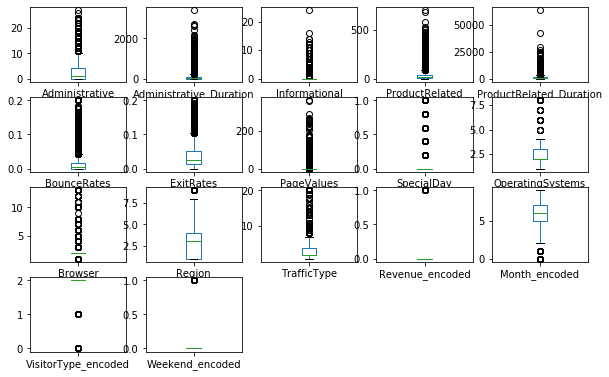

In [22]:
odf.plot(kind= 'box', subplots=True ,layout=(5,5), figsize=(10,8))
plt.show()

#### Treating outliers

In [23]:
# Administrative
q1_a=np.quantile(odf['Administrative'],q=0.25)
q2_a=np.quantile(odf['Administrative'],q=0.50)
q3_a=np.quantile(odf['Administrative'],q=0.75)
iqr_a=q3_a-q1_a
ll_a=q1_a-(1.5*iqr_a)
ul_a=q3_a+(1.5*iqr_a)

# Administrative_Duration
q1_ad=np.quantile(odf['Administrative_Duration'],q=0.25)
q2_ad=np.quantile(odf['Administrative_Duration'],q=0.50)
q3_ad=np.quantile(odf['Administrative_Duration'],q=0.75)
iqr_ad=q3_ad-q1_ad
ll_ad=q1_ad-(1.5*iqr_ad)
ul_ad=q3_ad+(1.5*iqr_ad)

# Informational

q1_i=np.quantile(odf['Informational'],q=0.25)
q2_i=np.quantile(odf['Informational'],q=0.50)
q3_i=np.quantile(odf['Informational'],q=0.75)
iqr_i=q3_i-q1_i
ll_i=q1_i-(1.5*iqr_i)
ul_i=q3_i+(1.5*iqr_i)

# ProductRelated 
q1_t=np.quantile(odf['ProductRelated'],q=0.25)
q2_t=np.quantile(odf['ProductRelated'],q=0.50)
q3_t=np.quantile(odf['ProductRelated'],q=0.75)
iqr_t=q3_t-q1_t
ll_t=q1_t-(1.5*iqr_t)
ul_t=q3_t+(1.5*iqr_t)

# ProductRelated_Duration
q1_pd=np.quantile(odf['ProductRelated_Duration'],q=0.25)
q2_pd=np.quantile(odf['ProductRelated_Duration'],q=0.50)
q3_pd=np.quantile(odf['ProductRelated_Duration'],q=0.75)
iqr_pd=q3_pd-q1_pd
ll_pd=q1_pd-(1.5*iqr_pd)
ul_pd=q3_pd+(1.5*iqr_pd)

# BounceRates
q1_b=np.quantile(odf['BounceRates'],q=0.25)
q2_b=np.quantile(odf['BounceRates'],q=0.50)
q3_b=np.quantile(odf['BounceRates'],q=0.75)
iqr_b=q3_b-q1_b
ll_b=q1_b-(1.5*iqr_b)
ul_b=q3_b+(1.5*iqr_b)

# ExitRates
q1_e=np.quantile(odf['ExitRates'],q=0.25)
q2_e=np.quantile(odf['ExitRates'],q=0.50)
q3_e=np.quantile(odf['ExitRates'],q=0.75)
iqr_e=q3_e-q1_e
ll_e=q1_e-(1.5*iqr_e)
ul_e=q3_e+(1.5*iqr_e)

# PageValues
q1_p=np.quantile(odf['PageValues'],q=0.25)
q2_p=np.quantile(odf['PageValues'],q=0.50)
q3_p=np.quantile(odf['PageValues'],q=0.75)
iqr_p=q3_p-q1_p
ll_p=q1_p-(1.5*iqr_p)
ul_p=q3_p+(1.5*iqr_p)

##### replacing outliers with null values

In [24]:
#odf['Administrative']=odf['Administrative'].where(odf['Administrative']<=ul_a,np.nan)
odf['Administrative_Duration']=odf['Administrative_Duration'].where(odf['Administrative_Duration']<=ul_ad,np.nan)
odf['ProductRelated']=odf['ProductRelated'].where(odf['ProductRelated']<=ul_t,np.nan)
odf['BounceRates']=odf['BounceRates'].where(odf['BounceRates']<=ul_b,np.nan)
odf['ExitRates']=odf['ExitRates'].where(odf['ExitRates']<=ul_e,np.nan)
odf['ProductRelated_Duration']=odf['ProductRelated_Duration'].where(odf['ProductRelated_Duration']<=ul_pd,np.nan)

In [25]:
odf.isnull().sum()

Administrative                0
Administrative_Duration    1172
Informational                 0
ProductRelated              987
ProductRelated_Duration     961
BounceRates                1551
ExitRates                  1099
PageValues                    0
SpecialDay                    0
OperatingSystems              0
Browser                       0
Region                        0
TrafficType                   0
Revenue_encoded               0
Month_encoded                 0
VisitorType_encoded           0
Weekend_encoded               0
dtype: int64

#### MICE for replacing above null values

In [26]:
#pip install impyute

In [27]:
from impyute.imputation.cs import mice

# start the MICE training
#m=mice(odf)
odf[['Administrative','Administrative_Duration','Informational','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Revenue_encoded','Month_encoded','VisitorType_encoded','Weekend_encoded']]=mice(odf)

C:\Users\PRiyaranjan\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [28]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
Administrative             12330 non-null float64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null float64
ProductRelated             12330 non-null float64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
OperatingSystems           12330 non-null float64
Browser                    12330 non-null float64
Region                     12330 non-null float64
TrafficType                12330 non-null float64
Revenue_encoded            12330 non-null float64
Month_encoded              12330 non-null float64
VisitorType_encoded        12330 non-null float64
Weekend_encoded            12330 non-null float64
dtypes: float64(17)
memory usage: 1.6 MB


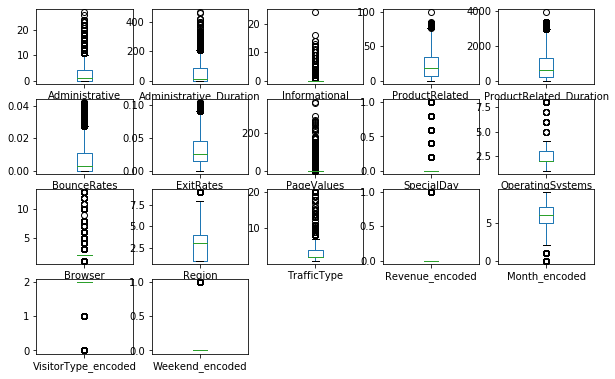

In [29]:
odf.plot(kind= 'box', subplots=True ,layout=(5,5), figsize=(10,8))
plt.show()

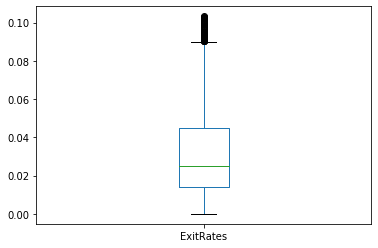

In [30]:
odf['ExitRates'].plot(kind='box')
plt.show()

In [31]:
odf=odf.drop_duplicates()

In [32]:
odf.shape

(12204, 17)

In [33]:
odf[odf['ExitRates']>ul_e]

,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue_encoded,Month_encoded,VisitorType_encoded,Weekend_encoded


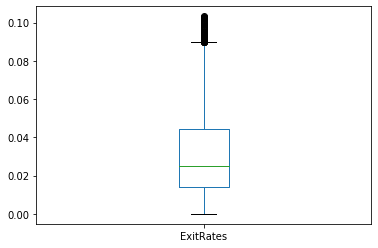

In [34]:
odf['ExitRates'].plot(kind='box')
plt.show()

In [35]:
odf['OperatingSystems'].value_counts(normalize=True)*100

2.0    53.597181
1.0    20.878401
3.0    20.730908
4.0     3.916749
8.0     0.614553
6.0     0.155687
7.0     0.057358
5.0     0.049164
Name: OperatingSystems, dtype: float64

In [36]:
odf['Region'].value_counts(normalize=True)*100

1.0    38.618486
3.0    19.493609
4.0     9.595215
2.0     9.242871
6.0     6.563422
7.0     6.211078
9.0     4.137988
8.0     3.531629
5.0     2.605703
Name: Region, dtype: float64

In [37]:
odf['Browser'].value_counts(normalize=True)*100

2.0     64.585382
1.0     19.878728
4.0      5.989839
5.0      3.818420
6.0      1.425762
10.0     1.335628
8.0      1.106195
3.0      0.860374
13.0     0.458866
7.0      0.401508
12.0     0.081940
11.0     0.049164
9.0      0.008194
Name: Browser, dtype: float64

In [38]:
odf['TrafficType'].value_counts(normalize=True)*100

2.0     32.038676
1.0     19.567355
3.0     16.494592
4.0      8.734841
13.0     5.965257
10.0     3.687316
6.0      3.629957
8.0      2.810554
5.0      2.130449
11.0     2.023927
20.0     1.581449
9.0      0.335955
7.0      0.327761
15.0     0.303179
19.0     0.139299
14.0     0.106522
18.0     0.081940
16.0     0.024582
17.0     0.008194
12.0     0.008194
Name: TrafficType, dtype: float64

## EDA

### Univariate Analysis

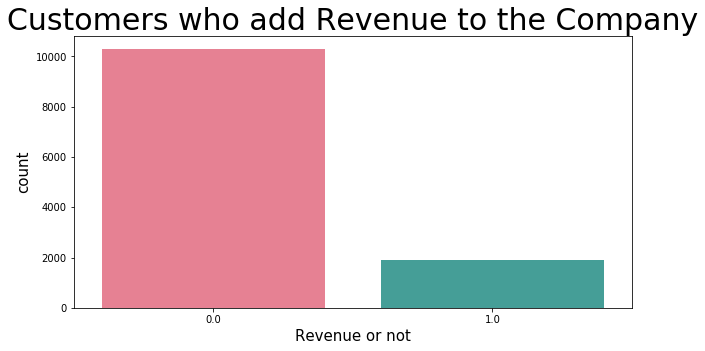

In [39]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(odf['Revenue_encoded'], palette = 'husl')
plt.title('Customers who add Revenue to the Company', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

#### Weekend

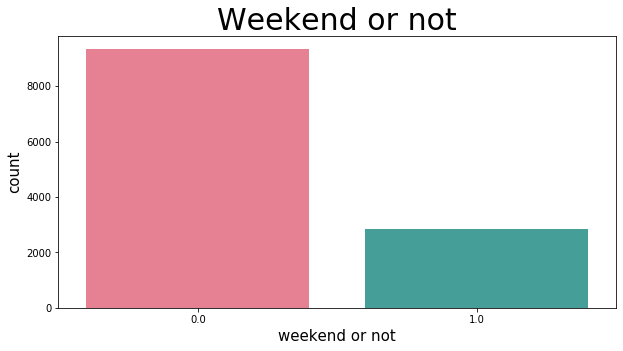

In [40]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(odf['Weekend_encoded'], palette = 'husl')
plt.title('Weekend or not', fontsize = 30)
plt.xlabel('weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

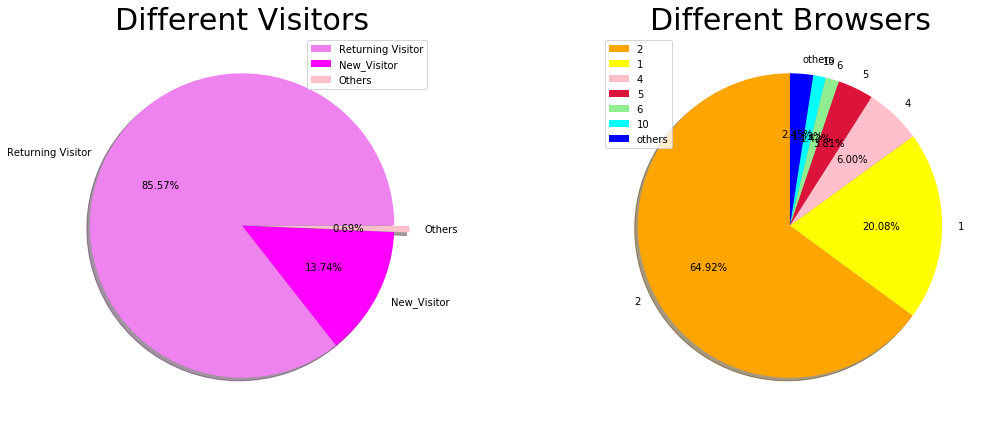

In [41]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

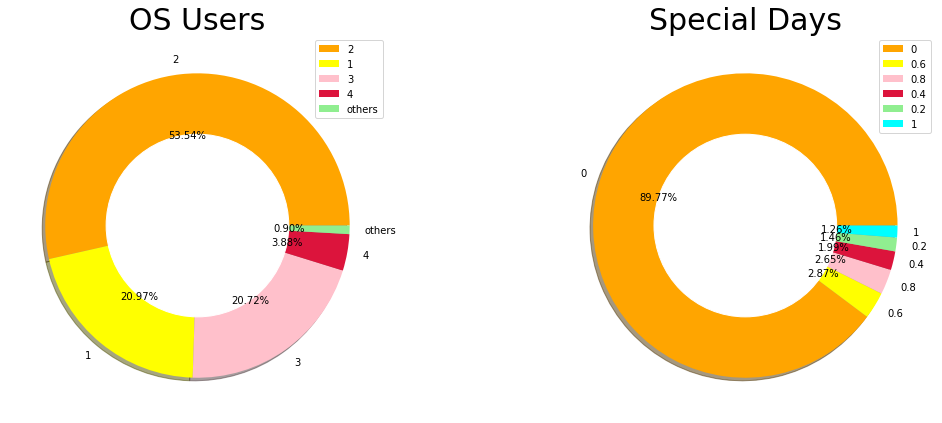

In [42]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OS Users', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# plotting a pie chart for share of special days

#size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson','lightgreen', 'cyan']
explode = [0, 0, 0, 0, 0, 0]
labels = "0", "0.6","0.8","0.4","0.2","1"

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(odf['SpecialDay'].value_counts(), colors = colors, labels = labels,explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

In [43]:
odf['OperatingSystems'].value_counts()

2.0    6541
1.0    2548
3.0    2530
4.0     478
8.0      75
6.0      19
7.0       7
5.0       6
Name: OperatingSystems, dtype: int64

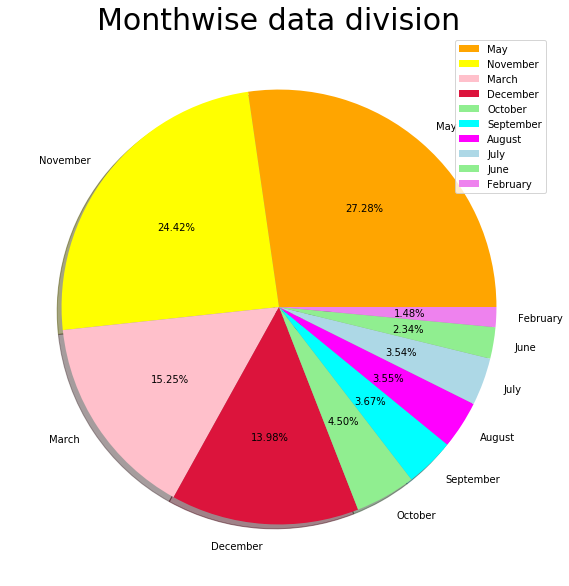

In [44]:
#size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plt.rcParams['figure.figsize'] = (10, 10)
circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(odf['Month_encoded'].value_counts(), colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Monthwise data division', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

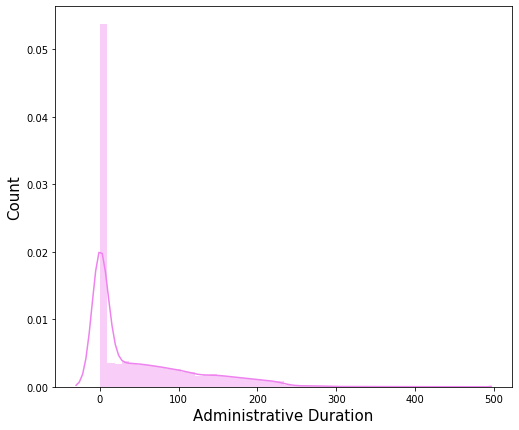

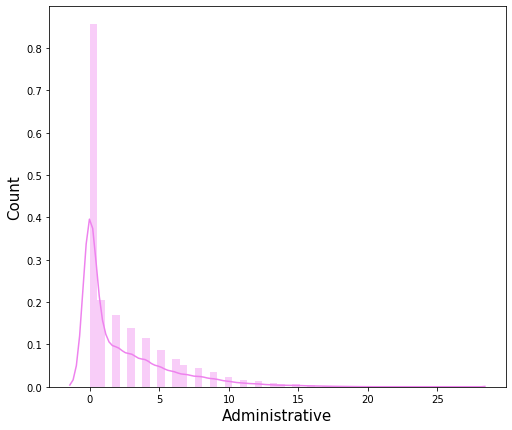

In [45]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['Administrative_Duration'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['Administrative'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

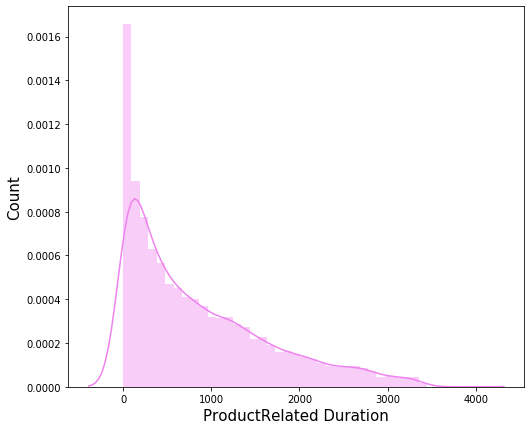

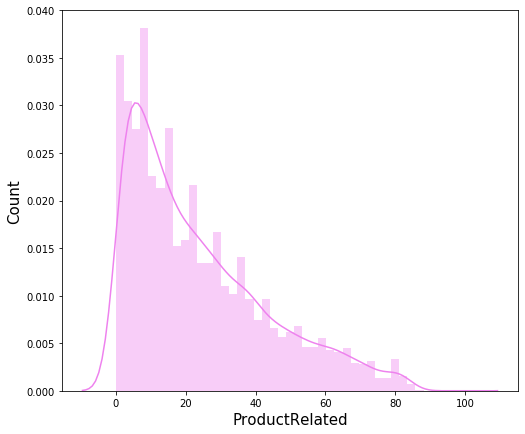

In [46]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['ProductRelated_Duration'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('ProductRelated Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['ProductRelated'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('ProductRelated', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

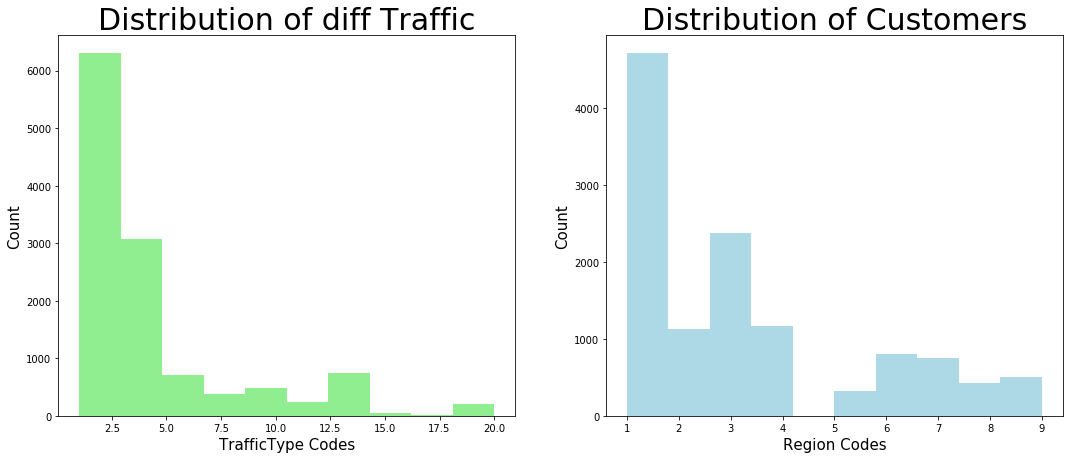

In [47]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(odf['TrafficType'], color = 'lightgreen')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# visualizing the distribution of customers around the Region

plt.subplot(1, 2, 2)
plt.hist(odf['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

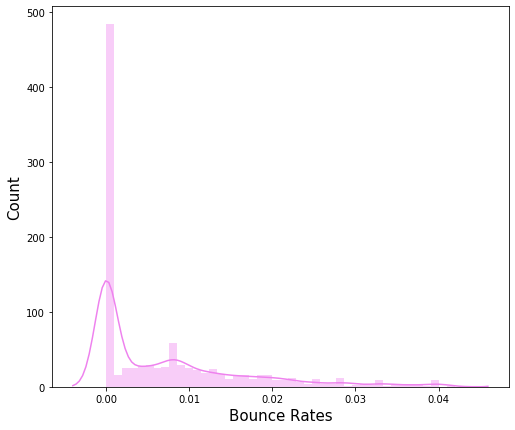

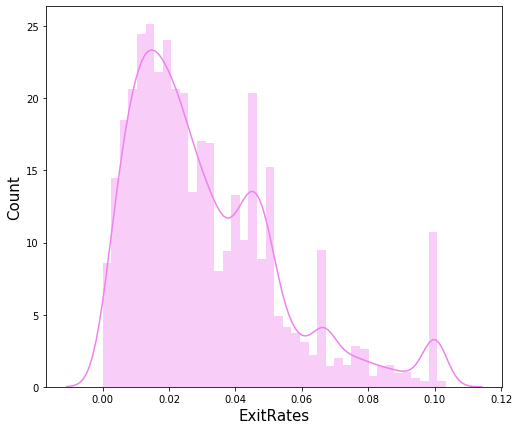

In [48]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.distplot(odf['BounceRates'], color = 'violet')
#plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

plt.subplot(1, 2, 2)
sns.distplot(odf['ExitRates'], color = 'violet')
#plt.title('Administrative', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

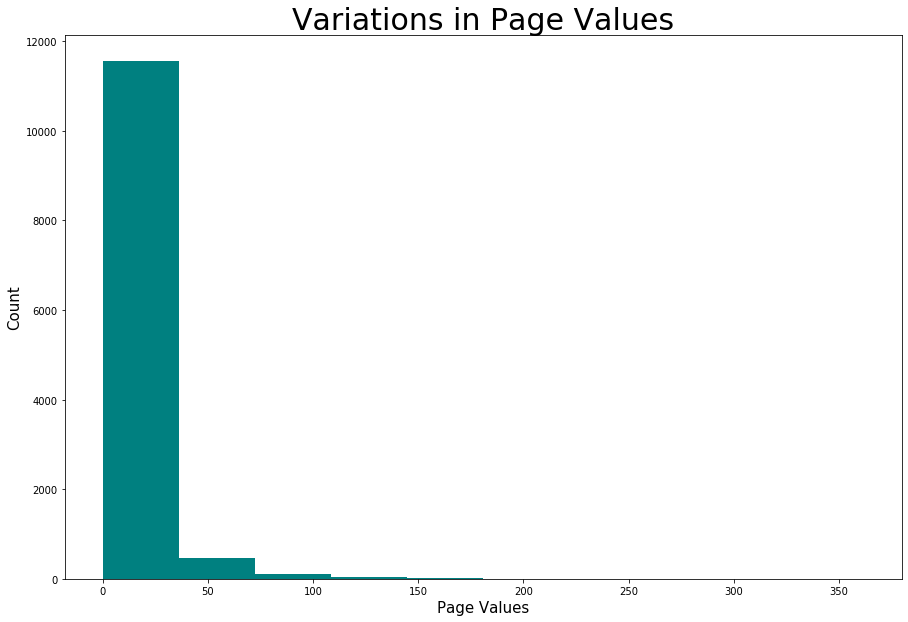

In [49]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(odf['PageValues'], color = 'teal')
plt.title('Variations in Page Values', fontsize = 30)
plt.xlabel('Page Values', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

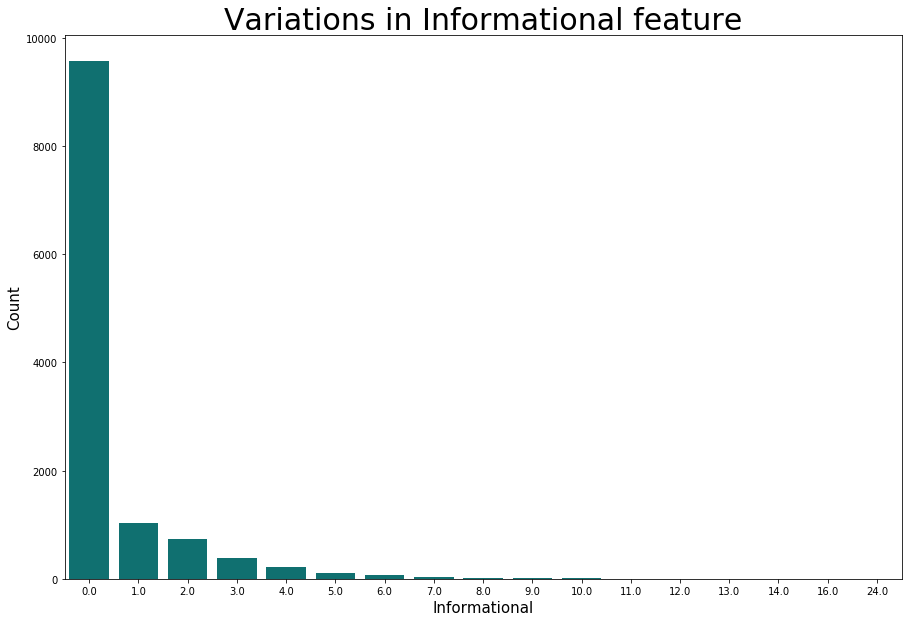

In [50]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(odf['Informational'], color = 'teal')
plt.title('Variations in Informational feature', fontsize = 30)
plt.xlabel('Informational', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### Bivariate Analysis

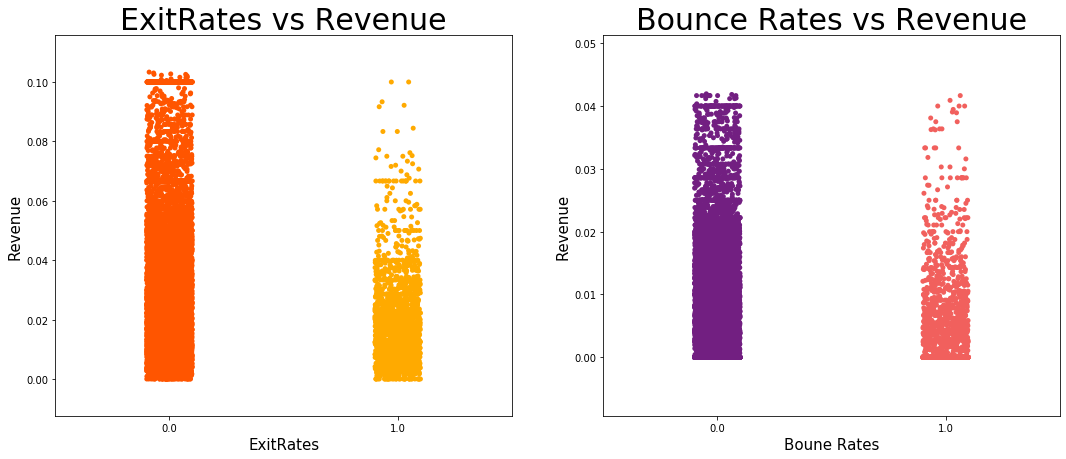

In [51]:
# exit rate vs revenue
y=odf['Revenue_encoded']
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(y, odf['ExitRates'], palette = 'autumn')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(y, odf['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

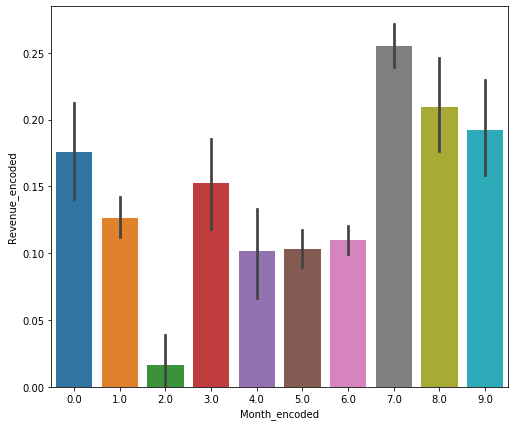

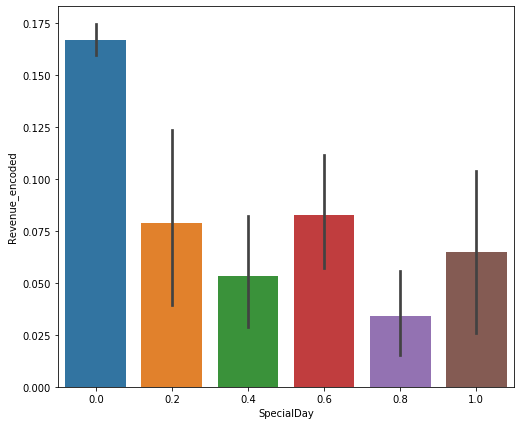

In [52]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.barplot(x=odf['Month_encoded'],y=odf['Revenue_encoded'])
plt.show()

plt.subplot(1, 2, 2)
sns.barplot(x=odf['SpecialDay'],y=odf['Revenue_encoded'])
plt.show()

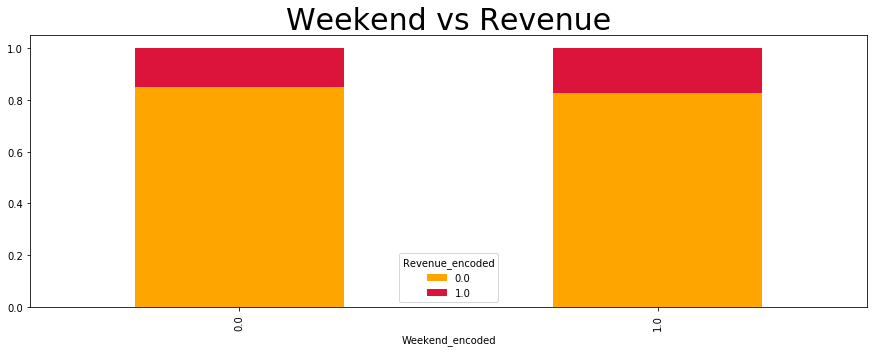

In [53]:
# weekend vs Revenue

df = pd.crosstab(odf['Weekend_encoded'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

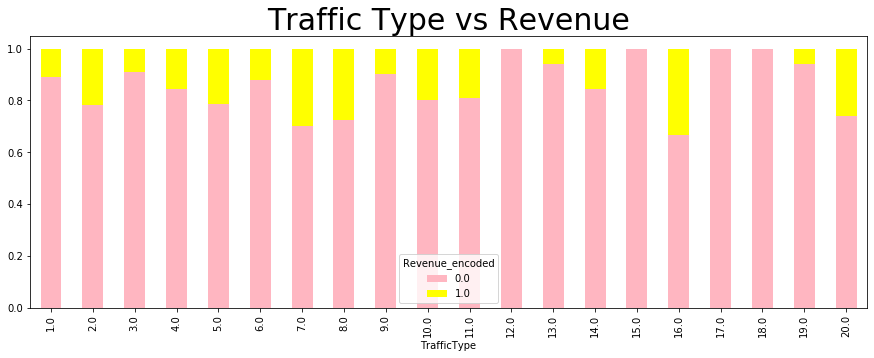

In [54]:
# Traffic Type vs Revenue

df = pd.crosstab(odf['TrafficType'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

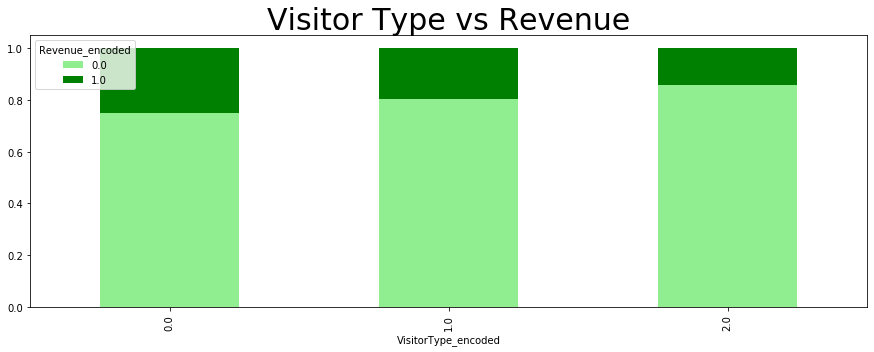

In [55]:
# visitor type vs revenue

df = pd.crosstab(odf['VisitorType_encoded'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()


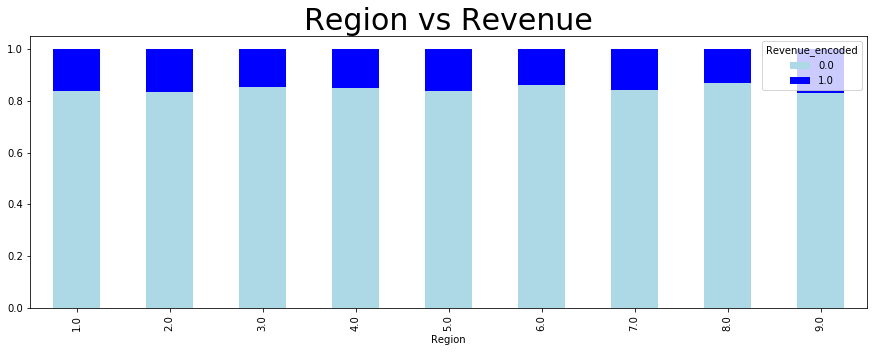

In [56]:
# region vs Revenue

df = pd.crosstab(odf['Region'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

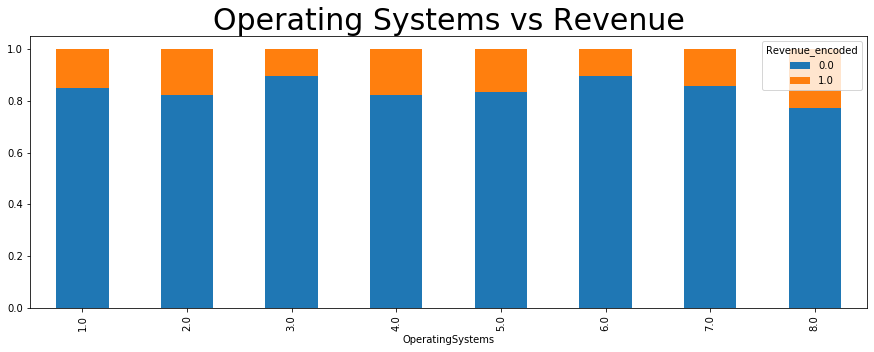

In [57]:
# region vs Revenue

df = pd.crosstab(odf['OperatingSystems'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5))
plt.title('Operating Systems vs Revenue', fontsize = 30)
plt.show()

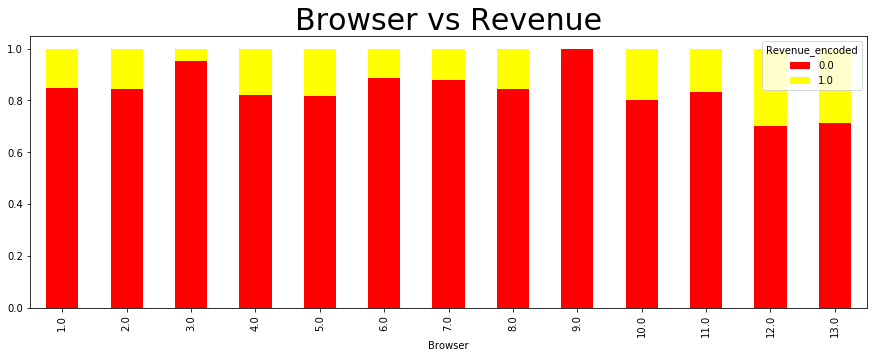

In [58]:
# region vs Revenue

df = pd.crosstab(odf['Browser'], odf['Revenue_encoded'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['red', 'yellow'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

Text(0, 0.5, 'Revenue')

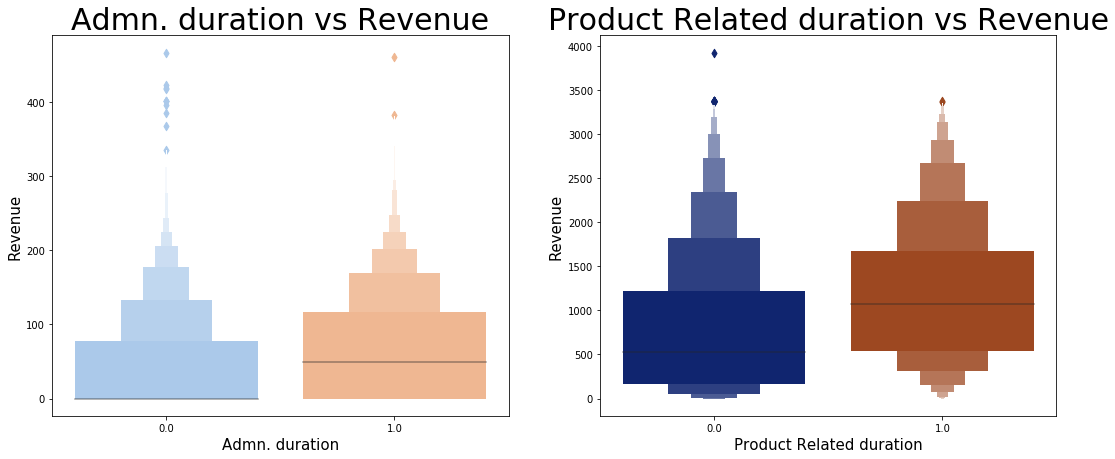

In [59]:
# administrative duration vs revenue
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.boxenplot(y, odf['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(1, 2, 2)
sns.boxenplot(y, odf['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)



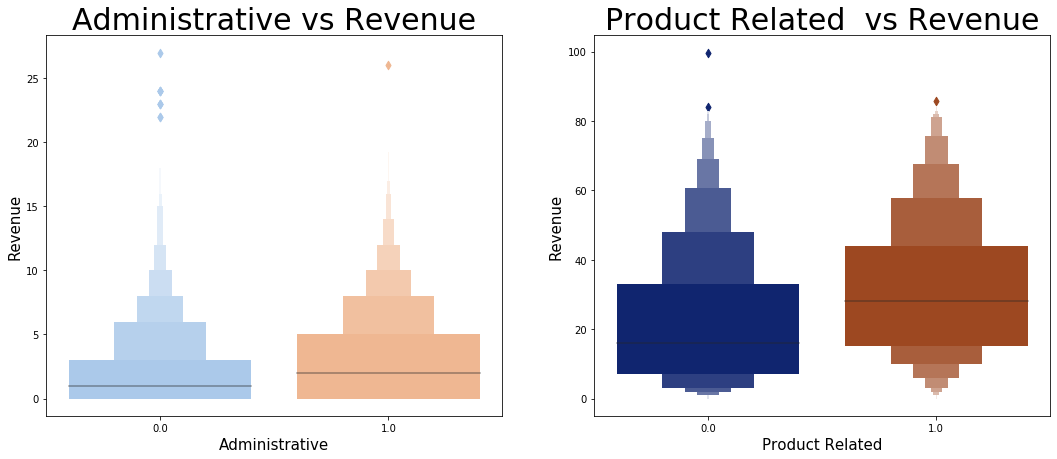

In [60]:
# administrative duration vs revenue
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.boxenplot(odf['Revenue_encoded'], odf['Administrative'], palette = 'pastel')
plt.title('Administrative vs Revenue', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(1, 2, 2)
sns.boxenplot(odf['Revenue_encoded'], odf['ProductRelated'], palette = 'dark')
plt.title('Product Related  vs Revenue', fontsize = 30)
plt.xlabel('Product Related', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.show()

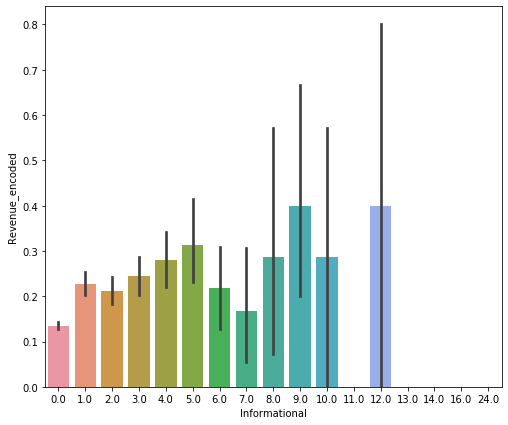

In [61]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.barplot(x=odf['Informational'],y=odf['Revenue_encoded'])
plt.show()

### Transformation

In [62]:
#df1 = odf.copy()
#df_final1 = df1.transform(lambda X: np.log(X))

In [63]:
df2 = odf.copy()
df2=df2[['Administrative_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues']].transform(lambda x: x**0.5)
#final_df = df2.transform(lambda x: x**0.5)

In [64]:
odf=odf.drop(['Administrative_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues'],1)


In [65]:
odf=pd.concat((odf,df2),1)

In [66]:
odf.head()

,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Revenue_encoded,Month_encoded,VisitorType_encoded,Weekend_encoded,Administrative_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.000000,0.089429,0.214488,0.0
1,0.0,0.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,2.0,2.0,0.0,0.0,8.000000,0.000000,0.316228,0.0
2,0.0,0.0,1.0,0.0,4.0,1.0,9.0,3.0,0.0,2.0,2.0,0.0,0.0,0.000000,0.093974,0.214514,0.0
3,0.0,0.0,2.0,0.0,3.0,2.0,2.0,4.0,0.0,2.0,2.0,0.0,0.0,1.632993,0.092164,0.214996,0.0
4,0.0,0.0,10.0,0.0,3.0,3.0,1.0,4.0,0.0,2.0,2.0,1.0,0.0,25.049950,0.141421,0.223607,0.0


In [67]:
old_df=pd.read_csv('online_shoppers_intention.csv')

In [68]:
#sns.kdeplot(df_final1['BounceRates'],shade=True)
#plt.show()

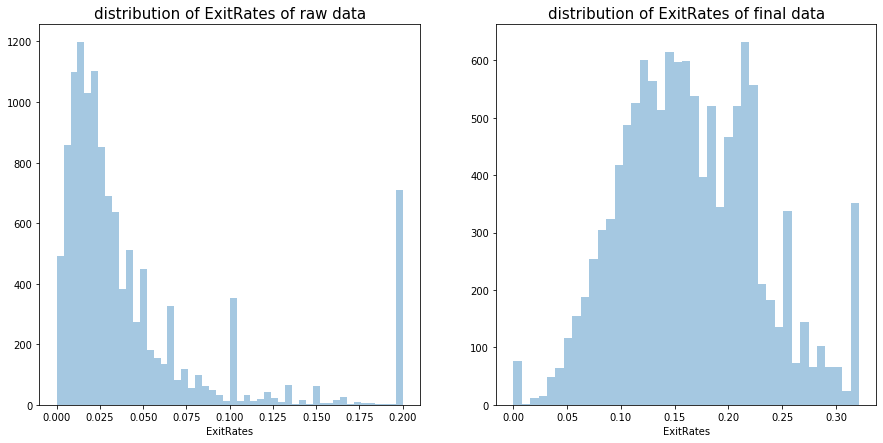

In [69]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(old_df['ExitRates'],kde=False)
plt.title('distribution of ExitRates of raw data', fontsize = 15)


plt.subplot(1, 2, 2)
sns.distplot(odf['ExitRates'],kde=False)
plt.title('distribution of ExitRates of final data', fontsize = 15)

plt.show()

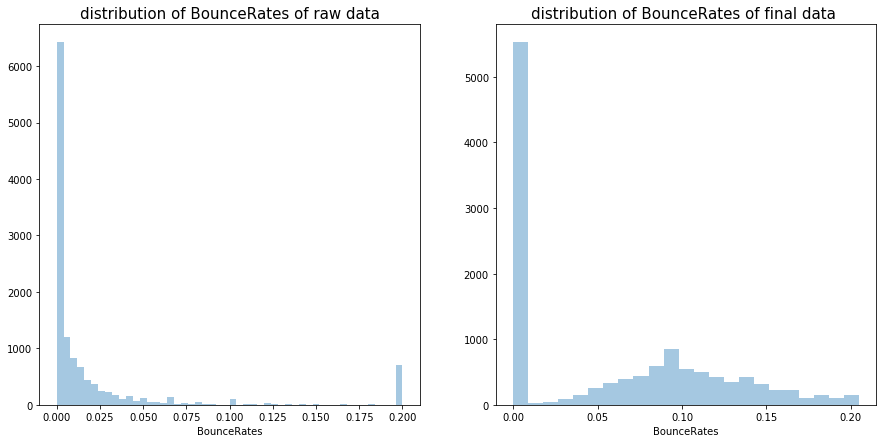

In [70]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(old_df['BounceRates'],kde=False)
plt.title('distribution of BounceRates of raw data', fontsize = 15)


plt.subplot(1, 2, 2)
sns.distplot(odf['BounceRates'],kde=False)
plt.title('distribution of BounceRates of final data ', fontsize = 15)

plt.show()

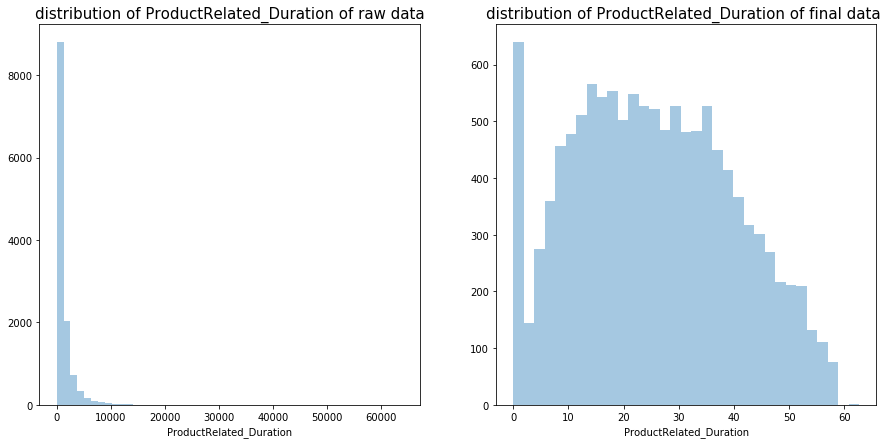

In [71]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(old_df['ProductRelated_Duration'],kde=False)
plt.title('distribution of ProductRelated_Duration of raw data', fontsize = 15)


plt.subplot(1, 2, 2)
sns.distplot(odf['ProductRelated_Duration'],kde=False)
plt.title('distribution of ProductRelated_Duration of final data ', fontsize = 15)

plt.show()

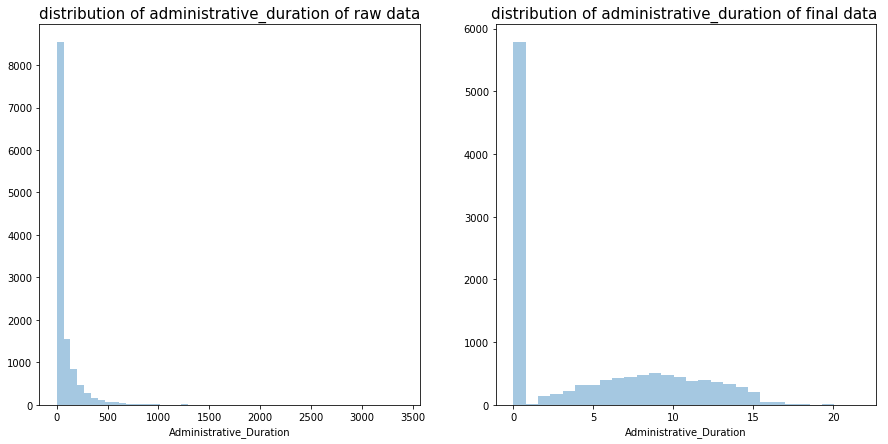

In [72]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(1, 2, 1)
sns.distplot(old_df['Administrative_Duration'],kde=False)
plt.title('distribution of administrative_duration of raw data', fontsize = 15)


plt.subplot(1, 2, 2)
sns.distplot(odf['Administrative_Duration'],kde=False)
plt.title('distribution of administrative_duration of final data ', fontsize = 15)

plt.show()

### Feature Selection

In [73]:
X=odf.drop('Revenue_encoded',axis=1)
import statsmodels.api as sm
X_constant=sm.add_constant(X)

C:\Users\PRiyaranjan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### Backward elimination

In [74]:
import statsmodels.api as sm
x=odf.drop('Revenue_encoded',axis=1)
y=odf['Revenue_encoded']
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('Final set of variables are: ',selected_features_BE)

Final set of variables are:  ['Informational', 'SpecialDay', 'OperatingSystems', 'Month_encoded', 'VisitorType_encoded', 'Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']


In [75]:
final_df=odf[['Informational', 'SpecialDay', 'OperatingSystems', 'Month_encoded', 'VisitorType_encoded', 'Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','Revenue_encoded']]
final_df.head()


,Informational,SpecialDay,OperatingSystems,Month_encoded,VisitorType_encoded,Administrative_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue_encoded
0,0.0,0.0,1.0,2.0,2.0,0.0,0.000000,0.089429,0.214488,0.0,0.0
1,0.0,0.0,2.0,2.0,2.0,0.0,8.000000,0.000000,0.316228,0.0,0.0
2,0.0,0.0,4.0,2.0,2.0,0.0,0.000000,0.093974,0.214514,0.0,0.0
3,0.0,0.0,3.0,2.0,2.0,0.0,1.632993,0.092164,0.214996,0.0,0.0
4,0.0,0.0,3.0,2.0,2.0,0.0,25.049950,0.141421,0.223607,0.0,0.0


### Basic Model

In [76]:
#X=final_df.drop('Revenue_encoded',1)
X=final_df.drop('Revenue_encoded',1)
y=final_df['Revenue_encoded']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=100)

#### Logistic Regression

In [77]:

################ logistic model: ##################

# Training model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

C:\Users\PRiyaranjan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred = logreg.predict(X_test)

In [79]:
logreg.score(X_test,y_test)

0.8770995493650143

In [80]:
logreg.score(X_train,y_train)

0.8916316705930554

In [81]:
import sklearn
print('Precision',sklearn.metrics.precision_score(y_test, y_pred))
print('Recall',sklearn.metrics.recall_score(y_test, y_pred))
print('F1',sklearn.metrics.f1_score(y_test, y_pred))

Precision 0.6704980842911877
Recall 0.4498714652956298
F1 0.5384615384615384


### Decision Tree

In [82]:

######### Decision Tree Classifier:

#Training Model
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
print('accuracy score training data :-',dt_default.score(X_test,y_test))

accuracy score training data :- 0.8484227775501844


In [84]:
print('accuracy score training data :-',dt_default.score(X_train,y_train))

accuracy score training data :- 0.9998975724674792


In [85]:
y_pred = dt_default.predict(X_test)
print('Precision',sklearn.metrics.precision_score(y_test, y_pred))
print('Recall',sklearn.metrics.recall_score(y_test, y_pred))
print('F1',sklearn.metrics.f1_score(y_test, y_pred))

Precision 0.5239294710327456
Recall 0.5347043701799485
F1 0.5292620865139949


### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
y_pred = rf.predict(X_test)

In [89]:
rf.score(X_train,y_train)

0.9998975724674792

In [90]:
rf.score(X_test,y_test)

0.8984022941417452

In [91]:
y_pred = rf.predict(X_test)
print('Precision',sklearn.metrics.precision_score(y_test, y_pred))
print('Recall',sklearn.metrics.recall_score(y_test, y_pred))
print('F1',sklearn.metrics.f1_score(y_test, y_pred))

Precision 0.7210031347962382
Recall 0.5912596401028277
F1 0.6497175141242938


# models on all features

In [109]:
#X=final_df.drop('Revenue_encoded',1)
X1=odf.drop('Revenue_encoded',1)
y1=final_df['Revenue_encoded']

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2, random_state=100)

#### Logistic Regression

In [110]:

################ logistic model: ##################

# Training model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X1_train,y1_train)
y_pred = logreg.predict(X1_test)

print('accuracy score on train data',logreg.score(X1_train,y1_train))
print('accuracy score on train data',logreg.score(X1_test,y1_test))

accuracy score on train data 0.8928608009833043
accuracy score on train data 0.8762802130274477


#### DT

In [111]:
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier()
dt_default.fit(X1_train,y1_train)

print('accuracy score training data :-',dt_default.score(X1_test,y1_test))
print('accuracy score training data :-',dt_default.score(X1_train,y1_train))

accuracy score training data :- 0.8488324457189677
accuracy score training data :- 1.0


#### RF

In [112]:
rf=RandomForestClassifier()
rf.fit(X1_train,y1_train)

print('accuracy score training data :-',rf.score(X1_test,y1_test))
print('accuracy score training data :-',rf.score(X1_train,y1_train))

accuracy score training data :- 0.8979926259729619
accuracy score training data :- 1.0


In [113]:
bagging_lr=sklearn.ensemble.BaggingClassifier(base_estimator=logreg)
bagging_lr.fit(X1_train,y1_train)

print('accuracy score training data :-',bagging_lr.score(X1_test,y1_test))
print('accuracy score training data :-',bagging_lr.score(X1_train,y1_train))

accuracy score training data :- 0.8775092175337976
accuracy score training data :- 0.8931680835808665


In [114]:
bagging_rf=sklearn.ensemble.BaggingClassifier(base_estimator=rf)
bagging_rf.fit(X1_train,y1_train)

print('accuracy score training data :-',bagging_rf.score(X1_test,y1_test))
print('accuracy score training data :-',bagging_rf.score(X1_train,y1_train))

accuracy score training data :- 0.8955346169602622
accuracy score training data :- 0.9776707979104783


### LGBM (selected features)

In [115]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(objective='binary' , random_state=5,n_estimators=200, n_jobs = -1)

#fit
lgbm.fit(X_train, y_train)

#prediction
y_pred = lgbm.predict(X_test)

In [116]:
print('accuracy score training data :-',lgbm.score(X_test,y_test))
print('accuracy score training data :-',lgbm.score(X_train,y_train))

accuracy score training data :- 0.8930766079475625
accuracy score training data :- 0.9773635153129161


In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
scores = cross_val_score(lgbm, X, y, cv=10)

In [119]:
scores.mean()

0.8824933204441402

### Random Search CV LogReg

In [120]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
from scipy.stats import uniform

In [122]:
penalty = ['l1', 'l2']

C = uniform(loc=0, scale=4)

hyperparameters = dict(C=C, penalty=penalty)

In [123]:
clf = RandomizedSearchCV(logreg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [124]:
best_model = clf.fit(X, y)

In [125]:
best_model.best_estimator_

LogisticRegression(C=2.2112879147430635, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
final_logreg=LogisticRegression(C=3.87304630287759, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
final_logreg.fit(X_train,y_train)

LogisticRegression(C=3.87304630287759, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
final_logreg.score(X_train,y_train)

0.8921438082556591

In [129]:
final_logreg.score(X_test,y_test)

0.8783285538713642

In [130]:
y_pred = final_logreg.predict(X_test)
print('Precision',sklearn.metrics.precision_score(y_test, y_pred))
print('Recall',sklearn.metrics.recall_score(y_test, y_pred))
print('F1',sklearn.metrics.f1_score(y_test, y_pred))

Precision 0.676923076923077
Recall 0.4524421593830334
F1 0.5423728813559322


#### RandomSerach LGBM

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_train

array([[-0.39450159, -0.31169318, -1.24218586, ...,  0.26980479,
         0.54177601,  0.56081235],
       [ 1.21432004, -0.31169318, -0.1325271 , ..., -0.9572001 ,
        -1.93545224,  0.9109564 ],
       [-0.39450159, -0.31169318, -1.24218586, ..., -0.9572001 ,
        -1.19501202,  1.07930998],
       ...,
       [-0.39450159, -0.31169318, -1.24218586, ..., -0.9572001 ,
        -0.24818334,  1.8435719 ],
       [-0.39450159, -0.31169318, -0.1325271 , ...,  0.85520616,
         0.71837911, -0.45103328],
       [-0.39450159, -0.31169318, -0.1325271 , ..., -0.9572001 ,
        -0.33972856, -0.45103328]])

In [133]:
X_train=pd.DataFrame(X_train)
X_train.columns=X_test.columns
X_train.head()

,Informational,SpecialDay,OperatingSystems,Month_encoded,VisitorType_encoded,Administrative_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.394502,-0.311693,-1.242186,0.774113,0.41182,0.337971,0.578372,0.269805,0.541776,0.560812
1,1.214320,-0.311693,-0.132527,0.350192,0.41182,1.482617,2.087416,-0.957200,-1.935452,0.910956
2,-0.394502,-0.311693,-1.242186,-0.073729,0.41182,1.809694,2.229223,-0.957200,-1.195012,1.079310
3,-0.394502,-0.311693,-0.132527,-1.769414,0.41182,1.243135,1.964684,0.344235,-0.646692,0.151106
4,-0.394502,2.690340,0.977132,0.350192,0.41182,-0.905902,-1.748131,0.880030,1.056282,-0.451033


In [134]:
X_test=ss.transform(X_test)
X_test=pd.DataFrame(X_test)
X_test.columns=X_train.columns
X_train.head()

,Informational,SpecialDay,OperatingSystems,Month_encoded,VisitorType_encoded,Administrative_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.394502,-0.311693,-1.242186,0.774113,0.41182,0.337971,0.578372,0.269805,0.541776,0.560812
1,1.214320,-0.311693,-0.132527,0.350192,0.41182,1.482617,2.087416,-0.957200,-1.935452,0.910956
2,-0.394502,-0.311693,-1.242186,-0.073729,0.41182,1.809694,2.229223,-0.957200,-1.195012,1.079310
3,-0.394502,-0.311693,-0.132527,-1.769414,0.41182,1.243135,1.964684,0.344235,-0.646692,0.151106
4,-0.394502,2.690340,0.977132,0.350192,0.41182,-0.905902,-1.748131,0.880030,1.056282,-0.451033


In [135]:
param_grid = {'n_estimators': range(1,100),
              'max_depth': range(1,30),
              'num_leaves':range(1,32)
             }

In [136]:
clf = RandomizedSearchCV(lgbm, param_grid, random_state=1, cv=5, n_jobs=-1)

In [137]:
best_model = clf.fit(X, y)

In [138]:
best_model.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=17,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=31, n_jobs=-1, num_leaves=24, objective='binary',
               random_state=5, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [139]:
final_lgbm=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=15,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=26, n_jobs=-1, num_leaves=17, objective='binary',
               random_state=5, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [140]:
final_lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=15,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=26, n_jobs=-1, num_leaves=17, objective='binary',
               random_state=5, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [141]:
final_lgbm.score(X_train,y_train)

0.9162142783980334

In [142]:
final_lgbm.score(X_test,y_test)

0.899631298648095

In [143]:
y_pred = final_lgbm.predict(X_test)
print('Precision',sklearn.metrics.precision_score(y_test, y_pred))
print('Recall',sklearn.metrics.recall_score(y_test, y_pred))
print('F1',sklearn.metrics.f1_score(y_test, y_pred))

Precision 0.7208588957055214
Recall 0.6041131105398457
F1 0.6573426573426573


#### Random Search Random forest

In [144]:

###### Hyper-Parameter Tunning:

n_folds = 5            # n_folds = 10
param_grid = {'n_estimators': range(1,10),
              'criterion':['gini','entropy'],
              'max_depth': range(5,15,5),
              'oob_score': ["True","False"],
              'bootstrap': ["True","False"],
              'n_jobs': [1]                         #keep it 1 only
             }
rf = RandomForestClassifier()


In [145]:
clf = RandomizedSearchCV(rf, param_grid, random_state=1, cv=5, n_jobs=-1)

In [146]:
best_model = clf.fit(X, y)

In [147]:
best_model.best_estimator_

RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
                       oob_score='False', random_state=None, verbose=0,
                       warm_start=False)

In [148]:
final_rf=RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
                       oob_score='False', random_state=None, verbose=0,
                       warm_start=False)

In [149]:
final_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
                       oob_score='False', random_state=None, verbose=0,
                       warm_start=False)

In [150]:
final_rf.score(X_train,y_train)

0.9034108368329407

In [151]:
final_rf.score(X_test,y_test)

0.8820155673904138

In [152]:
y_pred = final_rf.predict(X_test)
print('Precision',sklearn.metrics.precision_score(y_test, y_pred))
print('Recall',sklearn.metrics.recall_score(y_test, y_pred))
print('F1',sklearn.metrics.f1_score(y_test, y_pred))

Precision 0.6735395189003437
Recall 0.5038560411311054
F1 0.5764705882352942


### Pipeline and Cross Val Socre

In [153]:
from sklearn.pipeline import Pipeline
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

pipe = Pipeline((
("ss", StandardScaler()),
("lgbm", LGBMClassifier()),
))
pipepca = Pipeline((
("ss", StandardScaler()),
('pca', PCA(n_components=10)),              #pca works when there is relationship between features
("lgbm", LGBMClassifier()),
))
#lr=LinearRegression()
scoresdtpipe = cross_val_score(pipe, X_train, y_train, cv=10)
scoresdtpipe1 = cross_val_score(pipe, X_test, y_test, cv=10)
#lrpca=LinearRegression()
scoresdtpca = cross_val_score(pipepca, X_train, y_train, cv=10)
scoresdtpca1 = cross_val_score(pipepca, X_test, y_test, cv=10)
print("avg cross val R2")
print(np.mean(scoresdtpipe))
print(np.mean(scoresdtpipe1))
print("avg cross val R2:2")
print(np.mean(scoresdtpca))
print(np.mean(scoresdtpca1))


avg cross val R2
0.8971632380824538
0.8787453997992639
avg cross val R2:2
0.8953184514321192
0.8758698561391771


#### KNN

In [154]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [155]:
knn.score(X_train,y_train)

0.9173409812557616

In [156]:
knn.score(X_test,y_test)

0.88529291274068

In [157]:
n_folds = 5            # n_folds = 10
param_grid = {'n_neighbors': range(1,100),
              'metric': ['minkowski'],
              'leaf_size':range(1,100),
              'p':[1,2],         # 1= Manhatten dist, 2=Euclidean Dist
              'n_jobs': [1]
             }
knn = KNeighborsClassifier()

grid_search = RandomizedSearchCV(knn,param_grid, random_state=1, cv=5, n_jobs=-1)
grid_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'leaf_size': range(1, 100),
                                        'metric': ['minkowski'], 'n_jobs': [1],
                                        'n_neighbors': range(1, 100),
                                        'p': [1, 2]},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [158]:
grid_search.best_params_   

{'p': 2,
 'n_neighbors': 33,
 'n_jobs': 1,
 'metric': 'minkowski',
 'leaf_size': 56}

In [159]:
knn = KNeighborsClassifier(p= 1,n_neighbors= 23, n_jobs= 1, metric= 'minkowski',leaf_size= 27)

In [160]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=27, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=23, p=1,
                     weights='uniform')

In [161]:
knn.score(X_train,y_train)

0.8994161630646318

In [162]:
knn.score(X_test,y_test)

0.8857025809094633

In [163]:
y_pred = knn.predict(X_test)
print('Precision',sklearn.metrics.precision_score(y_test, y_pred))
print('Recall',sklearn.metrics.recall_score(y_test, y_pred))
print('F1',sklearn.metrics.f1_score(y_test, y_pred))

Precision 0.7310924369747899
Recall 0.4473007712082262
F1 0.5550239234449761


In [ ]:
# Selcting Features based on Feature Importance

In [175]:
final_lgbm.feature_importances_

array([10,  5,  2, 99, 25, 58, 65, 33, 56, 63])

In [170]:
features=list(X_train.columns)

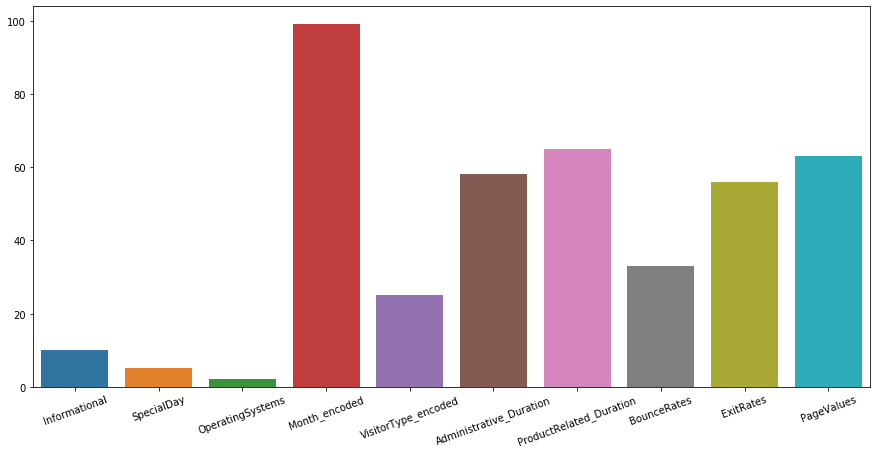

In [171]:
sns.barplot(x=features,y=importance)
plt.xticks(rotation=20)
plt.show()